In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
# 현재경로 확인
os.getcwd()

In [2]:
# 데이터 불러오기
corolla = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

# corolla.shape

1436 37


## 범주형 변수를 이진형 변수로 변환

In [4]:
## 가변수 생성
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [5]:
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [6]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [8]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

## 불필요한 변수 제거 및 가변수 추가


In [9]:
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

In [10]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [13]:
# data에 id와 model 지우고, 더미변수 추가

corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel),axis=1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [12]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

/Users/jihun/miniforge3/envs/env1/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [14]:
feature_columns = list(mlr_data.columns.difference(['Price']))  # price 빼고 모든 column name list

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [15]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [16]:
## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     298.2
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:38:57   Log-Likelihood:                -8452.0
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     971   BIC:                         1.714e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -402.8661    136.962     -2.941      0.003    -671.641    -134.091
Age_08_04         -117.3980      4.204    -27.927      0.000    -125.648    -109.148
Airbag_1           -37.7943    252.389     -0.150      0.881    -533.086     457.497
Airbag_2            51.2334    140.840      0.364      0.716    -225.152     327.619
Airco              268.3680     94.278      2.847      0.005      83.356     453.380
Automatic          328.5824    161.714      2.032      0.042      11.234     645.931
Automatic_airco   2209.0596    200.039     11.043      0.000    1816.500    2601.619
BOVAG_Guarantee    475.0742    130.001      3.654      0.000     219.959     730.189
Backseat_Divider   -99.1834    137.388     -0.722      0.471    -368.795     170.428
Boardcomputer     -334.4331    123.838     -2.701      0.007    -577.454     -91.412
CD_Player          181.9331    105.170      1.730      0.084     -24.454     388.321
CNG              -1939.2969    249.305     -7.779      0.000   -2428.535   -1450.059
Central_Lock        70.7451    145.432      0.486      0.627    -214.653     356.143
Cylinders           -0.0298      0.002    -11.940      0.000      -0.035      -0.025
Diesel            1766.8394    314.676      5.615      0.000    1149.316    2384.363
Doors              112.3361     43.348      2.592      0.010      27.270     197.402
Gears               65.2708    207.685      0.314      0.753    -342.293     472.834
Guarantee_Period    79.1772     15.128      5.234      0.000      49.490     108.865
HP                  52.8818      5.843      9.051      0.000      41.416      64.347
KM                  -0.0160      0.001    -11.958      0.000      -0.019      -0.013
Met_Color          -21.1208     80.028     -0.264      0.792    -178.168     135.927
Metallic_Rim        98.7477     98.197      1.006      0.315     -93.955     291.451
Mfg_Month          -94.7930     10.740     -8.826      0.000    -115.869     -73.717
Mfg_Year             2.7646      0.959      2.884      0.004       0.884       4.646
Mfr_Guarantee      266.4566     78.502      3.394      0.001     112.404     420.510
Mistlamps          -40.4822    114.301     -0.354      0.723    -264.788     183.823
Petrol             172.4501    236.012      0.731      0.465    -290.703     635.603
Power_Steering    -269.8822    285.616     -0.945      0.345    -830.379     290.615
Powered_Windows    342.6723    148.127      2.313      0.021      51.987     633.357
Quarterly_Tax       12.5394      1.922      6.524      0.000       8.767      16.311
Radio             1541.1820    802.804      1.920      0.055     -34.249    3116.614
Radio_cassette   -1626.9973    800.283     -2.033      0.042   -3197.481     -56.514
Sport_Model        340.2383     94.436      3.603      0.000     154.917     525.560
Tow_Bar            -70.

## VIF를 통한 다중공선성 확인 

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif


# 여기서.. Age_08_04 같은 경우는 VIF 가 '무한'이 나왔는데,
# summary에서 p-value는 굉장히 유의하게 나왔다. 이런 경우 이 변수를 지우지 않는 게 맞다.

/Users/jihun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/jihun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


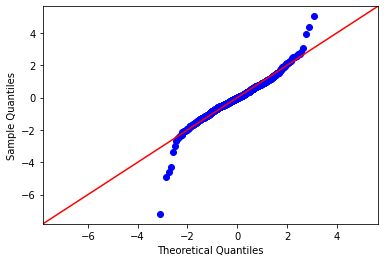

In [18]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot -> 선 위에 점이 모두 올라가 있으면 '정규분포'다.
    # 내 데이터가 정규분포에 가까운지 보기 위해 사용
fig = sm.qqplot(res, fit=True, line='45')

In [19]:
pred_y = fitted_full_model.predict(train_x)

Text(0, 0.5, 'Residual')

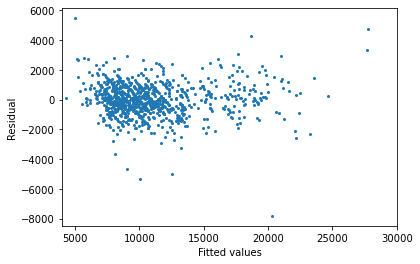

In [20]:
# residual pattern 확인
    # 등분산성 => 잔차의 분산이 일정한지 확인한다.
    # e.g. 예측값이 커짐에 따라 분산이 커지는가?
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [21]:
## 검증 데이터에 대한 예측
pred_y2 = fitted_full_model.predict(test_x)

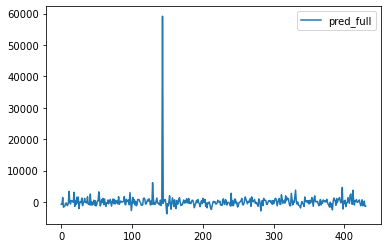

In [22]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
## MSE 성능
mean_squared_error(y_true=test_y, y_pred=pred_y2)

9261017.479166562

# 변수선택법

In [25]:
# X, y, feature를 받았을 때 AIC를 return하는 함수

def processSubset(X, y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf60508490>, 'AIC': 19100.073646442794}


In [26]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fbf818cca00>,
 'AIC': 16972.0125214352}

In [27]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.5481462478637695 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17604.726903
Name: 211, dtype: object


In [29]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.04574322700500488 seconds.
Processed  630 models on 2 predictors in 0.5259439945220947 seconds.
Processed  7140 models on 3 predictors in 5.6240739822387695 seconds.
Total elapsed time: 6.268043041229248 seconds.


In [30]:
models

,AIC,model
1,17825.177300,<statsmodels.regression.linear_model.Regressio...
2,17604.726903,<statsmodels.regression.linear_model.Regressio...
3,17408.714492,<statsmodels.regression.linear_model.Regressio...


In [31]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1933.
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:39:13   Log-Likelihood:                -8700.4
No. Observations:                1005   AIC:                         1.741e+04
Df Residuals:                    1001   BIC:                         1.743e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0253      0.001    -18.067      0.000      -0.028      -0.023
Mfg_Year    1473.0647     39.604     37.195      0.000    1395.349    1550.780
Weight        18.4033      0.991     18.579      0.000      16.459      20.347
const      -2.953e+06   7.87e+04    -37.536      0.000   -3.11e+06    -2.8e+06
==============================================================================
Omnibus:                      219.381   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2049.632
Skew:                          -0.716   Prob(JB):                         0.00
Kurtosis:                       9.848   Cond. No.                     1.41e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91019
full model AIC:  16972.01252
full model MSE:  13165015.73865
selected model Rsquared:  0.85278
selected model AIC:  17408.71449
selected model MSE:  13165015.73865


Text(0, 0.5, 'BIC')

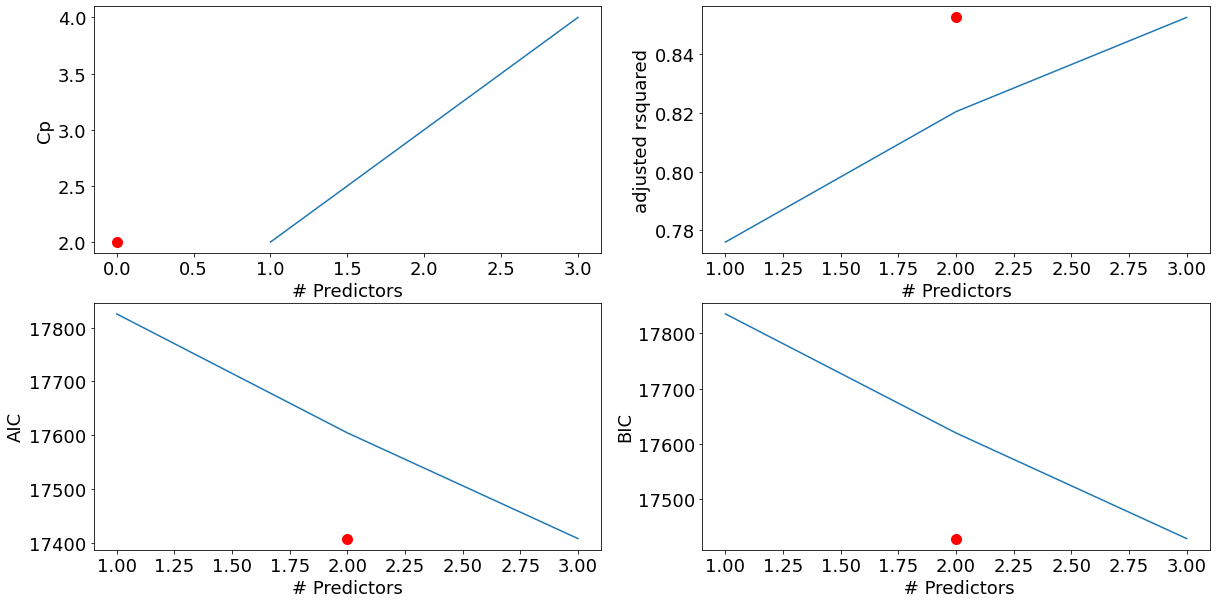

In [33]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [34]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [35]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [36]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.054180145263671875
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf48167550>
Processed  35 models on 2 predictors in 0.0330660343170166
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf736d7f70>
Processed  34 models on 3 predictors in 0.037448883056640625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf736d7c40>
Processed  33 models on 4 predictors in 0.04408383369445801
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf48171f40>
Processed  32 models on 5 predictors in 0.026289939880371094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'K

In [37]:
Forward_best_model.aic

16956.8096473835

In [38]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     469.8
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:44:21   Log-Likelihood:                -8456.4
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     983   BIC:                         1.706e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1122.7551    128.052      8.768      0.000     871.469    1374.042
Automatic_airco   2232.0134    185.882     12.008      0.000    1867.243    2596.784
HP                  54.7825      5.609      9.766      0.000      43.775      65.790
Weight              10.6060      1.430      7.419      0.000       7.801      13.411
KM                  -0.0160      0.001    -12.068      0.000      -0.019      -0.013
Powered_Windows    393.6894     86.134      4.571      0.000     224.662     562.716
BOVAG_Guarantee    431.2833    124.795      3.456      0.001     186.388     676.179
Guarantee_Period    80.8801     13.676      5.914      0.000      54.044     107.717
cc                  -4.2605      0.548     -7.777      0.000      -5.335      -3.185
Quarterly_Tax       12.1582      1.757      6.921      0.000       8.711      15.606
CNG              -3839.5228    503.617     -7.624      0.000   -4827.811   -2851.234
Sport_Model        338.6789     87.222      3.883      0.000     167.516     509.842
ABS               -404.8050    104.857     -3.861      0.000    -610.574    -199.036
Mfr_Guarantee      264.7205     76.906      3.442      0.001     113.802     415.639
Airco              286.1688     90.736      3.154      0.002     108.110     464.227
Petrol           -1783.4748    475.346     -3.752      0.000   -2716.284    -850.665
Boardcomputer     -353.3441    118.821     -2.974      0.003    -586.517    -120.171
Age_08_04          -24.3565     10.828     -2.249      0.025     -45.606      -3.107
Doors              102.2515     42.466      2.408      0.016      18.918     185.585
Automatic          318.1594    159.571      1.994      0.046       5.021     631.298
CD_Player          191.0147    100.905      1.893      0.059      -7.000     389.030
Cylinders        -5.278e+05   6.04e+04     -8.744      0.000   -6.46e+05   -4.09e+05
const            -1.319e+05   1.51e+04     -8.744      0.000   -1.62e+05   -1.02e+05
==============================================================================
Omnibus:                      125.321   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.517
Skew:                          -0.309   Prob(JB):                    1.90e-193
Kurtosis:                       7.562   Cond. No.                     7.49e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 후진소거법

In [39]:
######## 후진소거법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [40]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [41]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.12412428855895996
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf4813aa00>
Processed  35 models on 34 predictors in 0.06804513931274414
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year

In [42]:
Backward_best_model.aic

16956.616946715534

# 단계적 선택법

In [43]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [44]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.04598093032836914
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf4814de80>
forward
Processed  1 models on 0 predictors in 0.0016949176788330078
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf481725b0>
Processed  35 models on 2 predictors in 0.0431060791015625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf4814d1c0>
forward
Processed  2 models on 1 predictors in 0.0037131309509277344
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf81f5adf0>
Processed  34 models on 3 predictors in 0.03990888595581055
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResults

Processed  16 models on 15 predictors in 0.01929497718811035
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf72d3fd60>
Processed  20 models on 17 predictors in 0.024899959564208984
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'Petrol', 'Boardcomputer', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf4815b490>
forward
Processed  17 models on 16 predictors in 0.020447969436645508
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Ta

Processed  23 models on 22 predictors in 0.03426313400268555
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'Petrol', 'Boardcomputer', 'Age_08_04', 'Doors', 'Automatic', 'CD_Player', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf72d43a00>
backward
Processed  14 models on 23 predictors in 0.03145599365234375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Sport_Model', 'ABS', 'Mfr_Guarantee', 'Airco', 'Petrol', 'Boardcomputer', 'Age_08_04', 'Doors', 'Automatic', 'CD_Player', 'Cylinders', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbf72d42790>
forward
Processed  23 models on 22 predictors in 0.0

In [45]:
Stepwise_best_model.aic

16956.8096473835

# 성능평가 

In [50]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (25,) (23,)


In [52]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [53]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [54]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [55]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL        FORWARD        BACKWARD       STEPWISE
MSE   9261017.479167  9942355.47671  9897982.151138  9942355.47671
RMSE     3043.191989    3153.150088     3146.105871    3153.150088
MAE       926.730158     935.353077      937.762744     935.353077
MAPE        8.531455       8.610438        8.622518       8.610438


In [56]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))



37
23
25
23


# 잔차분석 내용 추가